# Project: Wrangling and Analyze Data

We start by importing all the libraries necessary for this project

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import json
import time
import requests
import tweepy

## Data Gathering

We want to gather information about a set of tweets belonging to the Twitter account WeRateDogs.

The information is contained in three separate datasets, that we will gather using three different methods.

1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

The first file is a csv that we read from our computer after downloading it.

In [3]:
df1 = pd.read_csv('twitter-archive-enhanced.csv')

In [4]:
df1.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

We gather the second dataset from a url that was given to us.

The url links to a tsv file.

In [6]:
url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"

In [7]:
r = requests.get(url)

In [8]:
r.status_code

200

In [9]:
with open((url.split('/')[-1]), 'wb') as file:
    file.write(r.content)

In [10]:
df2 = pd.read_csv('image-predictions.tsv', sep='\t')

In [11]:
df2.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [12]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

We were supposed to gather the data via the Twitter API. 

But, after 3 e-mails, they asked for a thorough analysis of what I would be doing which I was unable to do, given that I didn't know ahead of time what I was going to say precisely about the data.

So I decided to download the tweet-json.txt and go with it.

In [13]:
# tweet_ids = [1, 2]

In [14]:
# consumer_key = 'HIDDEN'
# consumer_secret = 'HIDDEN'
# access_token = 'HIDDEN'
# access_token_secret = 'HIDDEN'

# auth = tweepy.OAuth1UserHandler(
#    consumer_key, consumer_secret, access_token, access_token_secret
# )

# api = tweepy.API(auth)

# # public_tweets = api.home_timeline()
# # for tweet in public_tweets:
# #     print(tweet.text)

# count = 0
# fails_dict = {}
# start = time.time()

# with open('tweet_json.txt', 'w') as outfile:
#     for tweet_id in tweet_ids:
#         count += 1
#         print(str(count) + ": " + str(tweet_id))
#         try:
#             tweet = api.get_status(tweet_id, tweet_mode='extended')
#             print("Success")
#             json.dump(tweet._json, outfile)
#             outfile.write('\n')
#         except tweepy.errors.TweepyException as e:
#             print("Fail")
#             fails_dict[tweet_id] = e
#             pass

# end = time.time()
# print(end - start)
# print(fails_dict)


We read the JSON data and append it to a list line by line.

We extract the following fields: tweet ID, retweet count, and favorite count.

In [15]:
data_list =[]

with open('tweet-json.txt') as file:
    for line in file:
        data = json.loads(line)
        data_list.append([data['id'], data['favorite_count'], data['retweet_count']])

In [16]:
# data

In [17]:
# data_list

We then transform this list into a pandas DataFrame:

In [18]:
df3 = pd.DataFrame(data_list, columns=['tweet_id', 'favorites', 'retweets'])

In [19]:
df3.head()

,tweet_id,favorites,retweets
0,892420643555336193,39467,8853
1,892177421306343426,33819,6514
2,891815181378084864,25461,4328
3,891689557279858688,42908,8964
4,891327558926688256,41048,9774


In [20]:
df3.describe()

,tweet_id,favorites,retweets
count,2.354000e+03,2354.000000,2354.000000
mean,7.426978e+17,8080.968564,3164.797366
std,6.852812e+16,11814.771334,5284.770364
min,6.660209e+17,0.000000,0.000000
25%,6.783975e+17,1415.000000,624.500000
50%,7.194596e+17,3603.500000,1473.500000
75%,7.993058e+17,10122.250000,3652.000000
max,8.924206e+17,132810.000000,79515.000000


In [21]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   tweet_id   2354 non-null   int64
 1   favorites  2354 non-null   int64
 2   retweets   2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


## Assessing Data

We want to assess our three datasets.

For the purpose of this project, we needed to find at least 8 quality issues and 2 tidiness issues.


### Quality issues

#### 1. df1: some tweets are retweets and replies

In [22]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

We see that we have 78 replies and 181 retweets among our tweets.

We need to get rid of them.

#### 2. df2: Some images are not dogs.

In [23]:
df2.shape[0]

2075

In [24]:
df2[df2['p1_dog']==True].shape[0]

1532

In [25]:
df2[df2['p1_dog']==True].shape[0] / df2.shape[0]

0.7383132530120482

About 74% of our datasets are not dogs according to the machine learning algorithm.

#### 3. df1/df3: all the photo urls are of the same first picture

By visual assesment, I noticed that the urls of the photos where there is more than one picture are the same.

Let's take on example: the first tweet with a num_id different from 1 in the second dataset.

In [26]:
df2[df2['img_num'] != 1]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
144,668623201287675904,https://pbs.twimg.com/media/CUdtP1xUYAIeBnE.jpg,4,Chihuahua,0.708163,True,Pomeranian,0.091372,True,titi,0.067325,False
312,671547767500775424,https://pbs.twimg.com/media/CVHRIiqWEAAj98K.jpg,2,Loafer,0.255088,False,platypus,0.090019,False,cowboy_boot,0.066536,False
315,671735591348891648,https://pbs.twimg.com/media/CVJ79MzW4AEpTom.jpg,2,stone_wall,0.271121,False,Irish_wolfhound,0.063078,True,poncho,0.048226,False
319,671768281401958400,https://pbs.twimg.com/media/CVKZsHtWwAA6gPj.jpg,2,Chihuahua,0.500373,True,French_bulldog,0.112796,True,Italian_greyhound,0.062893,True
345,672272411274932228,https://pbs.twimg.com/media/CVRkLuJWUAAhhYp.jpg,2,pug,0.914685,True,Norwegian_elkhound,0.014982,True,Siamese_cat,0.009221,False
...,...,...,...,...,...,...,...,...,...,...,...,...
2051,887473957103951883,https://pbs.twimg.com/media/DFDw2tyUQAAAFke.jpg,2,Pembroke,0.809197,True,Rhodesian_ridgeback,0.054950,True,beagle,0.038915,True
2055,888202515573088257,https://pbs.twimg.com/media/DFDw2tyUQAAAFke.jpg,2,Pembroke,0.809197,True,Rhodesian_ridgeback,0.054950,True,beagle,0.038915,True
2056,888554962724278272,https://pbs.twimg.com/media/DFTH_O-UQAACu20.jpg,3,Siberian_husky,0.700377,True,Eskimo_dog,0.166511,True,malamute,0.111411,True
2067,890729181411237888,https://pbs.twimg.com/media/DFyBahAVwAAhUTd.jpg,2,Pomeranian,0.566142,True,Eskimo_dog,0.178406,True,Pembroke,0.076507,True


In [27]:
df1[df1['tweet_id']==668623201287675904].expanded_urls.values[0]

'https://twitter.com/dog_rates/status/668623201287675904/photo/1,https://twitter.com/dog_rates/status/668623201287675904/photo/1,https://twitter.com/dog_rates/status/668623201287675904/photo/1,https://twitter.com/dog_rates/status/668623201287675904/photo/1'

If for our analysis, we want the url of the picture, as it is in the second dataframe, we would need to access it via the third dataset json file: data['extended_entities']['media'][img_num]['media_url'], with img_num being the image number (0 to 3, on twitter).

#### 4. df1: the columns doggo/pupper/puppo/fluffer are string fields (pandas objects) where it would make sense to have a boolean.

In [28]:
df1[(df1['doggo'] != 'None') & (df1['pupper'] != 'None') ].text.values

array(['This is Dido. She\'s playing the lead role in "Pupper Stops to Catch Snow Before Resuming Shadow Box with Dried Apple." 13/10 (IG: didodoggo) https://t.co/m7isZrOBX7',
       'Here we have Burke (pupper) and Dexter (doggo). Pupper wants to be exactly like doggo. Both 12/10 would pet at same time https://t.co/ANBpEYHaho',
       'Like doggo, like pupper version 2. Both 11/10 https://t.co/9IxWAXFqze',
       "This is Bones. He's being haunted by another doggo of roughly the same size. 12/10 deep breaths pupper everything's fine https://t.co/55Dqe0SJNj",
       "This is Pinot. He's a sophisticated doggo. You can tell by the hat. Also pointier than your average pupper. Still 10/10 would pet cautiously https://t.co/f2wmLZTPHd",
       'Pupper butt 1, Doggo 0. Both 12/10 https://t.co/WQvcPEpH2u',
       'RT @dog_rates: Like father (doggo), like son (pupper). Both 12/10 https://t.co/pG2inLaOda',
       'RT @dog_rates: This is just downright precious af. 12/10 for both pupper and doggo

I was thinking about a single column with one of the four options but some entries belong to more than one category.

#### 5. df1: some dogs have no name or just the letter a.

In [29]:
df1['name'].value_counts()

None       745
a           55
Charlie     12
Oliver      11
Cooper      11
          ... 
Snicku       1
Godi         1
Murphy       1
Darla        1
Siba         1
Name: name, Length: 957, dtype: int64

In [30]:
df1[['text', 'name']].values

array([["This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU",
        'Phineas'],
       ["This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",
        'Tilly'],
       ['This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB',
        'Archie'],
       ...,
       ['Here is a very happy pup. Big fan of well-maintained decks. Just look at that tongue. 9/10 would cuddle af https://t.co/y671yMhoiR',
        'a'],
       ['This is a western brown Mitsubishi terrier. Upset about leaf. Actually 2 dogs here. 7/10 would walk the shit out of https://t.co/r7mOb2m0UI',
        'a'],
       ['Here we have a Japanese Irish Setter. Lost eye in Vietnam (?). Big fan of relaxing on stair. 8/10 would pet https://t.co/BLDqew2Ijj',
        'None']

It lools like the name is inferred from the structure of the text: "Here is...", "There is...". So when this structure is not used to name a dog, the name field is not filled appropriately.

In addition, common words and "None" should leave the field empty if the goal is to have an idea about the number of dogs named in tweets.

#### 6. df1: Even when discarding the retweets and replies, there are some missing expanded_urls

In [31]:
df1[df1['retweeted_status_id'].isnull() & df1['in_reply_to_status_id'].isnull()].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2097 non-null   int64  
 1   in_reply_to_status_id       0 non-null      float64
 2   in_reply_to_user_id         0 non-null      float64
 3   timestamp                   2097 non-null   object 
 4   source                      2097 non-null   object 
 5   text                        2097 non-null   object 
 6   retweeted_status_id         0 non-null      float64
 7   retweeted_status_user_id    0 non-null      float64
 8   retweeted_status_timestamp  0 non-null      object 
 9   expanded_urls               2094 non-null   object 
 10  rating_numerator            2097 non-null   int64  
 11  rating_denominator          2097 non-null   int64  
 12  name                        2097 non-null   object 
 13  doggo                       2097 

There are 3 tweets with missing values.

#### 7. df1: the source field points to a small number of values.

In [32]:
df1['source'].value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

The source column with the html tag could be replaced by a simpler description.

#### 8. df1: The timestamp is a string, when it should be a datetime object.

In [33]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

#### 9. df2: There are duplicated images (same jpg urls) corresponding to different tweets (different tweet_ids).

In [34]:
# df1[df1.duplicated()]
df2[df2.duplicated(subset=['jpg_url'])]
# df3[df3.duplicated()]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1297,752309394570878976,https://pbs.twimg.com/ext_tw_video_thumb/67535...,1,upright,0.303415,False,golden_retriever,0.181351,True,Brittany_spaniel,0.162084,True
1315,754874841593970688,https://pbs.twimg.com/media/CWza7kpWcAAdYLc.jpg,1,pug,0.272205,True,bull_mastiff,0.251530,True,bath_towel,0.116806,False
1333,757729163776290825,https://pbs.twimg.com/media/CWyD2HGUYAQ1Xa7.jpg,2,cash_machine,0.802333,False,schipperke,0.045519,True,German_shepherd,0.023353,True
1345,759159934323924993,https://pbs.twimg.com/media/CU1zsMSUAAAS0qW.jpg,1,Irish_terrier,0.254856,True,briard,0.227716,True,soft-coated_wheaten_terrier,0.223263,True
1349,759566828574212096,https://pbs.twimg.com/media/CkNjahBXAAQ2kWo.jpg,1,Labrador_retriever,0.967397,True,golden_retriever,0.016641,True,ice_bear,0.014858,False
...,...,...,...,...,...,...,...,...,...,...,...,...
1903,851953902622658560,https://pbs.twimg.com/media/C4KHj-nWQAA3poV.jpg,1,Staffordshire_bullterrier,0.757547,True,American_Staffordshire_terrier,0.149950,True,Chesapeake_Bay_retriever,0.047523,True
1944,861769973181624320,https://pbs.twimg.com/media/CzG425nWgAAnP7P.jpg,2,Arabian_camel,0.366248,False,house_finch,0.209852,False,cocker_spaniel,0.046403,True
1992,873697596434513921,https://pbs.twimg.com/media/DA7iHL5U0AA1OQo.jpg,1,laptop,0.153718,False,French_bulldog,0.099984,True,printer,0.077130,False
2041,885311592912609280,https://pbs.twimg.com/media/C4bTH6nWMAAX_bJ.jpg,1,Labrador_retriever,0.908703,True,seat_belt,0.057091,False,pug,0.011933,True


We want each row to correspond to one picture. 

But different tweets (i.e. different tweet_id's) refer to the same picture.

#### 10. df1:there is a list of urls in the expanded_urls field.

In [35]:
from collections import Counter

In [36]:
Counter([len(x) for x in df1['expanded_urls'].dropna().str.split(',')])

Counter({1: 1658, 2: 365, 4: 134, 3: 120, 5: 10, 6: 6, 8: 4})

The field contains a list of the urls relevant to the tweet, instead of a single value.

### Tidiness issues

#### 1. There are 3 datasets.

In [37]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [38]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [39]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   tweet_id   2354 non-null   int64
 1   favorites  2354 non-null   int64
 2   retweets   2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


There are three datasets. We would prefer one dataset with the features of the three datasets.

#### 2. df1: the columns doggo/pupper/puppo/fluffer are string fields (pandas objects) where it would make sense to have a boolean.

In [40]:
df1[(df1['doggo'] != 'None') & (df1['pupper'] != 'None') ].text.values

array(['This is Dido. She\'s playing the lead role in "Pupper Stops to Catch Snow Before Resuming Shadow Box with Dried Apple." 13/10 (IG: didodoggo) https://t.co/m7isZrOBX7',
       'Here we have Burke (pupper) and Dexter (doggo). Pupper wants to be exactly like doggo. Both 12/10 would pet at same time https://t.co/ANBpEYHaho',
       'Like doggo, like pupper version 2. Both 11/10 https://t.co/9IxWAXFqze',
       "This is Bones. He's being haunted by another doggo of roughly the same size. 12/10 deep breaths pupper everything's fine https://t.co/55Dqe0SJNj",
       "This is Pinot. He's a sophisticated doggo. You can tell by the hat. Also pointier than your average pupper. Still 10/10 would pet cautiously https://t.co/f2wmLZTPHd",
       'Pupper butt 1, Doggo 0. Both 12/10 https://t.co/WQvcPEpH2u',
       'RT @dog_rates: Like father (doggo), like son (pupper). Both 12/10 https://t.co/pG2inLaOda',
       'RT @dog_rates: This is just downright precious af. 12/10 for both pupper and doggo

I was thinking about a single column with one of the four options but some entries belong to more than one category.

#### To summarize:

#### We have 8 quality issues:
#### 1. df1: some tweets are retweets and replies
#### 2. df2: Some images are not dogs.
#### 3. df1/df3: all the photo urls are of the same first picture
#### 4. df1: the columns doggo/pupper/puppo/fluffer are string fields (pandas objects) where it would make sense to have a boolean.
#### 5. df1: some dogs have no name or just the letter a.
#### 6. df1: Even when discarding the retweets and replies, there are some missing expanded_urls
#### 7. df1: the source field points to a small number of values.
#### 8. df1: The timestamp is a string, when it should be a datetime object.
#### 9. df2: There are duplicated images (same jpg urls) corresponding to different tweets (different tweet_ids).
#### 10. df1:there is a list of urls in the expanded_urls field.

#### And we have 2 tidiness issues:
#### 1. There are 3 datasets.
#### 2. df1: the columns doggo/pupper/puppo/fluffer are string fields (pandas objects) where it would make sense to have a boolean.


## Cleaning Data

We first make a copy of the original datasets, in order to keep the originals untouched during the process.

We will also solve the issues noticed during our assessment, not in the order we found them, but one dataset at a time.


In [41]:
df1_clean = df1.copy()

In [42]:
df2_clean = df2.copy()

In [43]:
df3_clean = df3.copy()

### Issue #1:

#### Define: There are retweets and replies in the dataset.

#### Code:

In [44]:
df1_clean = df1[df1['retweeted_status_id'].isnull() & df1['in_reply_to_status_id'].isnull()]

In [45]:
df1_clean.drop(columns = ['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'], inplace=True)

C:\Users\julien.roquelaure\Anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


#### Test:

In [46]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [47]:
df1_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2097 non-null   int64 
 1   timestamp           2097 non-null   object
 2   source              2097 non-null   object
 3   text                2097 non-null   object
 4   expanded_urls       2094 non-null   object
 5   rating_numerator    2097 non-null   int64 
 6   rating_denominator  2097 non-null   int64 
 7   name                2097 non-null   object
 8   doggo               2097 non-null   object
 9   floofer             2097 non-null   object
 10  pupper              2097 non-null   object
 11  puppo               2097 non-null   object
dtypes: int64(3), object(9)
memory usage: 213.0+ KB


We see that we got rid of the replies and retweets, keeping only original tweets. We also got rid of the corresponding columns.

### Issue #2:

#### Define: The timestamp field is a string object

#### Code:

In [48]:
df1_clean.loc[:, 'timestamp'] = pd.to_datetime(df1_clean.timestamp)

C:\Users\julien.roquelaure\Anaconda3\lib\site-packages\pandas\core\indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


#### Test:

In [49]:
df1_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2097 non-null   int64              
 1   timestamp           2097 non-null   datetime64[ns, UTC]
 2   source              2097 non-null   object             
 3   text                2097 non-null   object             
 4   expanded_urls       2094 non-null   object             
 5   rating_numerator    2097 non-null   int64              
 6   rating_denominator  2097 non-null   int64              
 7   name                2097 non-null   object             
 8   doggo               2097 non-null   object             
 9   floofer             2097 non-null   object             
 10  pupper              2097 non-null   object             
 11  puppo               2097 non-null   object             
dtypes: datetime64[ns, UTC](1), int64(3

In [50]:
df1_clean.timestamp

0      2017-08-01 16:23:56+00:00
1      2017-08-01 00:17:27+00:00
2      2017-07-31 00:18:03+00:00
3      2017-07-30 15:58:51+00:00
4      2017-07-29 16:00:24+00:00
                  ...           
2351   2015-11-16 00:24:50+00:00
2352   2015-11-16 00:04:52+00:00
2353   2015-11-15 23:21:54+00:00
2354   2015-11-15 23:05:30+00:00
2355   2015-11-15 22:32:08+00:00
Name: timestamp, Length: 2097, dtype: datetime64[ns, UTC]

### Issue #3:

#### Define: The expanded_urls field in the first dataset (and the data from the Twitter API) is a list of urls corresponding to the tweet. In addition,  there are some missing values, and the list of urls pertaining to the image do not correspond to the image url itself.

#### Code:

In [51]:
df1_clean = df1_clean.drop(columns= ['expanded_urls'])

#### Test:

In [52]:
df1_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2097 non-null   int64              
 1   timestamp           2097 non-null   datetime64[ns, UTC]
 2   source              2097 non-null   object             
 3   text                2097 non-null   object             
 4   rating_numerator    2097 non-null   int64              
 5   rating_denominator  2097 non-null   int64              
 6   name                2097 non-null   object             
 7   doggo               2097 non-null   object             
 8   floofer             2097 non-null   object             
 9   pupper              2097 non-null   object             
 10  puppo               2097 non-null   object             
dtypes: datetime64[ns, UTC](1), int64(3), object(7)
memory usage: 196.6+ KB


This variable is redundant with the id. The relevant url is the jpg_url that is found easily in the second data (and buried in the json from the API).

### Issue #4:

#### Define: The source field takes a small number of different values.

#### Code:

In [53]:
source_array = df1_clean['source'].unique()

In [54]:
source_array

array(['<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>',
       '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>',
       '<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>',
       '<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>'],
      dtype=object)

In [55]:
df1_clean['source'] = df1_clean['source'].map({source_array[0]: 'iPhone', source_array[1]: 'Web', source_array[2]: 'Vine', source_array[3]: 'TweetDeck'})

#### Test:

In [56]:
df1_clean['source'].value_counts()

iPhone       1964
Vine           91
Web            31
TweetDeck      11
Name: source, dtype: int64

### Issue #5:

#### Define: In the name field there are 'None' and 'a' values. And after further investigation, some common words remain.

#### Code:

In [57]:
df1_clean['name'].value_counts()

None       603
a           55
Lucy        11
Charlie     11
Oliver      10
          ... 
Carly        1
Edmund       1
Zeus         1
Snicku       1
Siba         1
Name: name, Length: 955, dtype: int64

In [58]:
df1_clean['name'] = df1_clean['name'].replace({'None': None, 'a': None})

#### Test:

In [59]:
df1_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2097 non-null   int64              
 1   timestamp           2097 non-null   datetime64[ns, UTC]
 2   source              2097 non-null   object             
 3   text                2097 non-null   object             
 4   rating_numerator    2097 non-null   int64              
 5   rating_denominator  2097 non-null   int64              
 6   name                1439 non-null   object             
 7   doggo               2097 non-null   object             
 8   floofer             2097 non-null   object             
 9   pupper              2097 non-null   object             
 10  puppo               2097 non-null   object             
dtypes: datetime64[ns, UTC](1), int64(3), object(7)
memory usage: 196.6+ KB


In [60]:
df1_clean['name'].value_counts()

Lucy       11
Charlie    11
Cooper     10
Oliver     10
Tucker      9
           ..
Jockson     1
Rodman      1
Carly       1
Edmund      1
Siba        1
Name: name, Length: 953, dtype: int64

In [61]:
df1_clean['name'].unique()

array(['Phineas', 'Tilly', 'Archie', 'Darla', 'Franklin', None, 'Jax',
       'Zoey', 'Cassie', 'Koda', 'Bruno', 'Ted', 'Stuart', 'Oliver',
       'Jim', 'Zeke', 'Ralphus', 'Gerald', 'Jeffrey', 'such', 'Canela',
       'Maya', 'Mingus', 'Derek', 'Roscoe', 'Waffles', 'Jimbo', 'Maisey',
       'Earl', 'Lola', 'Kevin', 'Yogi', 'Noah', 'Bella', 'Grizzwald',
       'Rusty', 'Gus', 'Stanley', 'Alfy', 'Koko', 'Rey', 'Gary', 'Elliot',
       'Louis', 'Jesse', 'Romeo', 'Bailey', 'Duddles', 'Jack', 'Steven',
       'Beau', 'Snoopy', 'Shadow', 'Emmy', 'Aja', 'Penny', 'Dante',
       'Nelly', 'Ginger', 'Benedict', 'Venti', 'Goose', 'Nugget', 'Cash',
       'Jed', 'Sebastian', 'Sierra', 'Monkey', 'Harry', 'Kody', 'Lassie',
       'Rover', 'Napolean', 'Boomer', 'Cody', 'Rumble', 'Clifford',
       'Dewey', 'Scout', 'Gizmo', 'Walter', 'Cooper', 'Harold', 'Shikha',
       'Lili', 'Jamesy', 'Coco', 'Sammy', 'Meatball', 'Paisley', 'Albus',
       'Neptune', 'Belle', 'Quinn', 'Zooey', 'Dave', 'Jersey', '

By visual inspection, we see that some common nouns and articles remain like 'the', or 'space'.

#### Code:

In [62]:
(df1_clean[df1_clean['name'].str.lower() == df1_clean['name']]['name']).value_counts()

the             8
an              6
one             4
very            4
just            3
quite           3
not             2
actually        2
getting         2
by              1
unacceptable    1
this            1
light           1
space           1
officially      1
mad             1
my              1
incredibly      1
life            1
such            1
old             1
his             1
infuriating     1
all             1
Name: name, dtype: int64

In [63]:
common_list = (df1_clean[df1_clean['name'].str.lower() == df1_clean['name']]['name']).unique()
common_list

array(['such', 'quite', 'not', 'one', 'incredibly', 'very', 'my', 'his',
       'an', 'actually', 'just', 'getting', 'mad', 'this', 'unacceptable',
       'all', 'old', 'infuriating', 'the', 'by', 'officially', 'life',
       'light', 'space'], dtype=object)

In [64]:
df1_clean['name'].mask(df1_clean['name'].isin(common_list), None, inplace=True)

In [65]:
# df1_clean[df1_clean['name'].isin(common_list)]['name'] 

#### Test:

In [66]:
(df1_clean[df1_clean['name'].str.lower() == df1_clean['name']]['name'])

Series([], Name: name, dtype: object)

In [67]:
df1_clean['name'].unique()

array(['Phineas', 'Tilly', 'Archie', 'Darla', 'Franklin', None, 'Jax',
       'Zoey', 'Cassie', 'Koda', 'Bruno', 'Ted', 'Stuart', 'Oliver',
       'Jim', 'Zeke', 'Ralphus', 'Gerald', 'Jeffrey', 'Canela', 'Maya',
       'Mingus', 'Derek', 'Roscoe', 'Waffles', 'Jimbo', 'Maisey', 'Earl',
       'Lola', 'Kevin', 'Yogi', 'Noah', 'Bella', 'Grizzwald', 'Rusty',
       'Gus', 'Stanley', 'Alfy', 'Koko', 'Rey', 'Gary', 'Elliot', 'Louis',
       'Jesse', 'Romeo', 'Bailey', 'Duddles', 'Jack', 'Steven', 'Beau',
       'Snoopy', 'Shadow', 'Emmy', 'Aja', 'Penny', 'Dante', 'Nelly',
       'Ginger', 'Benedict', 'Venti', 'Goose', 'Nugget', 'Cash', 'Jed',
       'Sebastian', 'Sierra', 'Monkey', 'Harry', 'Kody', 'Lassie',
       'Rover', 'Napolean', 'Boomer', 'Cody', 'Rumble', 'Clifford',
       'Dewey', 'Scout', 'Gizmo', 'Walter', 'Cooper', 'Harold', 'Shikha',
       'Lili', 'Jamesy', 'Coco', 'Sammy', 'Meatball', 'Paisley', 'Albus',
       'Neptune', 'Belle', 'Quinn', 'Zooey', 'Dave', 'Jersey', 'Hobbes',

Visually, it seems that there are no remaining common nouns or articles.

We will assume capitalized words following a predetermined pattern like "This is ..." is a proper name for a dog.

### Issue #6:

#### Define: The columns doggo/pupper/puppo/fluffer are string fields (pandas objects) where it would make sense to have a boolean.

#### Code: 

In [68]:
df1_clean['doggo'] = df1_clean['doggo'].replace({'doggo': True, 'None': False})

In [69]:
df1_clean['floofer'] = df1_clean['floofer'].replace({'floofer': True, 'None': False})

In [70]:
df1_clean['pupper'] = df1_clean['pupper'].replace({'pupper': True, 'None': False})

In [71]:
df1_clean['puppo'] = df1_clean['puppo'].replace({'puppo': True, 'None': False})

In [72]:
df1_clean['nickname'] = df1_clean['doggo'] | df1_clean['floofer'] | df1_clean['pupper'] | df1_clean['puppo']

In [73]:
df1_clean = df1_clean.drop(columns = ['doggo', 'floofer', 'pupper', 'puppo'])

#### Test:

In [74]:
df1_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2097 non-null   int64              
 1   timestamp           2097 non-null   datetime64[ns, UTC]
 2   source              2097 non-null   object             
 3   text                2097 non-null   object             
 4   rating_numerator    2097 non-null   int64              
 5   rating_denominator  2097 non-null   int64              
 6   name                1390 non-null   object             
 7   nickname            2097 non-null   bool               
dtypes: bool(1), datetime64[ns, UTC](1), int64(3), object(3)
memory usage: 133.1+ KB


In [75]:
df1_clean['nickname'].value_counts()

False    1761
True      336
Name: nickname, dtype: int64

All of our 4 columns are now a boolean variable on a nickname given to a dog.

### Issue #7:

#### Define: There are 3 datasets. We want one master dataset.

#### Code:

In [76]:
df12_clean = df1_clean.merge(df2_clean, left_on='tweet_id', right_on='tweet_id')

In [77]:
df123_clean = df12_clean.merge(df3_clean, left_on='tweet_id', right_on='tweet_id')

#### Test:

In [78]:
df123_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 1970
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1971 non-null   int64              
 1   timestamp           1971 non-null   datetime64[ns, UTC]
 2   source              1971 non-null   object             
 3   text                1971 non-null   object             
 4   rating_numerator    1971 non-null   int64              
 5   rating_denominator  1971 non-null   int64              
 6   name                1349 non-null   object             
 7   nickname            1971 non-null   bool               
 8   jpg_url             1971 non-null   object             
 9   img_num             1971 non-null   int64              
 10  p1                  1971 non-null   object             
 11  p1_conf             1971 non-null   float64            
 12  p1_dog              1971 non-null 

### Issue #8:

#### Define: There are duplicate images corresponding to different tweets

#### Code: Test:

In [79]:
df123_clean[df123_clean.duplicated(subset=['jpg_url'])]

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,nickname,jpg_url,img_num,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorites,retweets


It seems that all the duplicated images that we detected in the assessment phase were retweets or replies.

So this issue was due to the replies and retwees.

### Issue #9:

#### Define: Some pictures are not dogs.

#### Code:

I first tried the following partition, where I added the confidence probabilities corresponding to a dog and compared it with the sum of the confidence probabilities of the image not being a dog:

In [80]:
# df_dog = df123_clean[(df123_clean['p1_conf'] * df123_clean['p1_dog'] + df123_clean['p2_conf'] * df123_clean['p2_dog'] 
#         + df123_clean['p3_conf'] * df123_clean['p3_dog']) > (df123_clean['p1_conf'] * ~df123_clean['p1_dog'] 
#         + df123_clean['p2_conf'] * ~df123_clean['p2_dog'] + df123_clean['p3_conf'] * ~df123_clean['p3_dog'])]

In [81]:
# df_nodog = df123_clean[(df123_clean['p1_conf'] * df123_clean['p1_dog'] + df123_clean['p2_conf'] * df123_clean['p2_dog'] 
#         + df123_clean['p3_conf'] * df123_clean['p3_dog']) < (df123_clean['p1_conf'] * ~df123_clean['p1_dog'] 
#         + df123_clean['p2_conf'] * ~df123_clean['p2_dog'] + df123_clean['p3_conf'] * ~df123_clean['p3_dog'])]

But it gave me too many false negatives. I found that the simpler following algorithm, where I condider the picture a dog if one of the best three guesses is a dog, gives me a better match:

In [82]:
df_zero_dog = df123_clean[(df123_clean['p1_dog'] == False) & (df123_clean['p2_dog'] == False) & (df123_clean['p3_dog'] == False)]

In [83]:
df_one_dog = df123_clean[(df123_clean['p1_dog'] == True) | (df123_clean['p2_dog'] == True) | (df123_clean['p3_dog'] == True)]

In [84]:
df123_clean = df_one_dog

#### Test:

In [85]:
df_zero_dog['jpg_url'].sample(5)

346     https://pbs.twimg.com/media/C1SddosXUAQcVR1.jpg
1584    https://pbs.twimg.com/media/CVhEoq4WcAE8pBm.jpg
748     https://pbs.twimg.com/media/Cl-EXHSWkAE2IN2.jpg
1964    https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg
1741    https://pbs.twimg.com/media/CU3NE8EWUAEVdPD.jpg
Name: jpg_url, dtype: object

In [86]:
df_one_dog['jpg_url'].sample(5)

1850    https://pbs.twimg.com/media/CUX_rAyWsAYZOQ5.jpg
920     https://pbs.twimg.com/media/CfAHv83UMAIEQYx.jpg
143     https://pbs.twimg.com/media/C-TIEwMW0AEjb55.jpg
1691    https://pbs.twimg.com/media/CVBY3e7XIAAAE4Y.jpg
488     https://pbs.twimg.com/media/CvLD-mbWYAAFI8w.jpg
Name: jpg_url, dtype: object

This way of keeping dog images is not perfect but every other method gave me less accurate dog identification when I sampled them.



#### The following issues are not from our assessing phase. 

#### There is nothing wrong per se with the data, but I need for my analysis to have one dog label instead of a triplet of guesses.

### Issue #10:

#### Define: For our analysis, we want to keep one label for each dog, so we will keep the dog label with the highest confidence.

#### Code:

In [87]:
def dog_label(row):
    if row['p1_dog'] == True:
        return row['p1']
    if row['p2_dog'] == True:
        return row['p2']
    if row['p3_dog'] == True:
        return row['p3']
    return None

In [88]:
df123_clean['p1_dog']

1        True
2        True
3       False
4        True
5        True
        ...  
1966     True
1967     True
1968     True
1969     True
1970     True
Name: p1_dog, Length: 1666, dtype: bool

In [89]:
df123_clean['dog_label'] = df123_clean.apply(lambda row: dog_label(row), axis=1)

In [90]:
df123_clean = df123_clean.drop(columns=['p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'])

#### Test:

In [91]:
df123_clean['dog_label'].value_counts()

golden_retriever        156
Labrador_retriever      106
Pembroke                 94
Chihuahua                90
pug                      62
                       ... 
Japanese_spaniel          1
Scotch_terrier            1
EntleBucher               1
Bouvier_des_Flandres      1
silky_terrier             1
Name: dog_label, Length: 113, dtype: int64

### Issue #11:

#### Define: The dog_label cell could have a nicer format.

#### Code:

In [92]:
df123_clean['dog_label'] = df123_clean['dog_label'].apply(lambda x: x.replace('_', ' ').title())

#### Test:

In [93]:
df123_clean['dog_label'].unique()

array(['Chihuahua', 'Labrador Retriever', 'Basset',
       'Chesapeake Bay Retriever', 'Appenzeller', 'Pomeranian',
       'Irish Terrier', 'Pembroke', 'Samoyed', 'French Bulldog',
       'Golden Retriever', 'Whippet', 'Siberian Husky',
       'Mexican Hairless', 'Kuvasz', 'Pug', 'Blenheim Spaniel',
       'Malamute', 'Italian Greyhound', 'Chow', 'German Shepherd',
       'Doberman', 'Eskimo Dog', 'Weimaraner', 'Saluki',
       'Miniature Pinscher', 'German Short-Haired Pointer',
       'English Springer', 'Vizsla', 'Bloodhound', 'Bernese Mountain Dog',
       'West Highland White Terrier', 'Cocker Spaniel',
       'Flat-Coated Retriever', 'Cardigan', 'Newfoundland',
       'Shetland Sheepdog', 'Komondor', 'Kelpie',
       'Greater Swiss Mountain Dog', 'Border Collie', 'Bull Mastiff',
       'Staffordshire Bullterrier', 'Australian Terrier',
       'Bouvier Des Flandres', 'Bedlington Terrier', 'Boston Bull',
       'Black-And-Tan Coonhound', 'Great Dane', 'Standard Poodle',
       'Yor

## Storing Data

We save the master dataset to a csv file.

In [94]:
df123_clean.to_csv('twitter_archive_master.csv')

## Analyzing and Visualizing Data

In this section, we will analyze and visualize our wrangled data. 

For this project, we had to produce at least You must produce at least 3 insights and 1 visualization.

### Insights: Visualizations:

#### 1. What breeds are the most represented in the dataset?

In [95]:
df123_counts = df123_clean['dog_label'].value_counts().rename_axis('dog_label').reset_index(name='count')

In [96]:
df123_counts = df123_counts.sort_values(by=['count'])

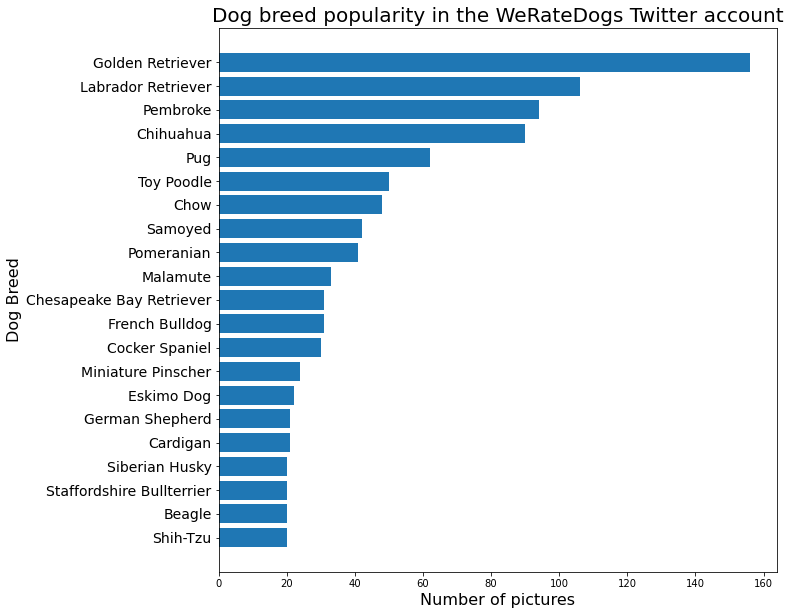

In [97]:
names = df123_counts[df123_counts['count'] >= 20]['dog_label']
values = df123_counts[df123_counts['count'] >= 20]['count']

plt.figure(figsize=(10, 10))

plt.barh(names, values)

plt.ylabel('Dog Breed', fontsize=16)
plt.xlabel('Number of pictures', fontsize=16)
plt.title('Dog breed popularity in the WeRateDogs Twitter account', fontsize=20)

plt.xticks(fontsize=10)
plt.yticks(fontsize=14)

plt.savefig('dog_popularity.png', bbox_inches='tight')

plt.show()

We chose the 20 most popular dog by number of pictures in the dataset, in order for the plot to be mroe legible.

#### 2. What breeds garner more likes/retweets?

In [98]:
df123_sub = df123_clean[['tweet_id', 'favorites', 'retweets', 'dog_label']]

In [99]:
df123_sub.groupby('dog_label').mean().describe()

,tweet_id,favorites,retweets
count,1.130000e+02,113.000000,113.000000
mean,7.367605e+17,8168.918033,2404.779630
std,3.368109e+16,4532.264290,1391.650794
min,6.717356e+17,885.000000,276.500000
25%,7.151542e+17,4914.750000,1369.875000
50%,7.343354e+17,7320.000000,2081.333333
75%,7.573327e+17,11051.031915,3103.946809
max,8.612885e+17,24060.000000,7510.166667


In [100]:
df123_10kfav= df123_sub.groupby('dog_label').mean()['favorites'][df123_sub.groupby('dog_label').mean()['favorites'] > 10000]

In [101]:
df123_10kfav = df123_10kfav.sort_values()

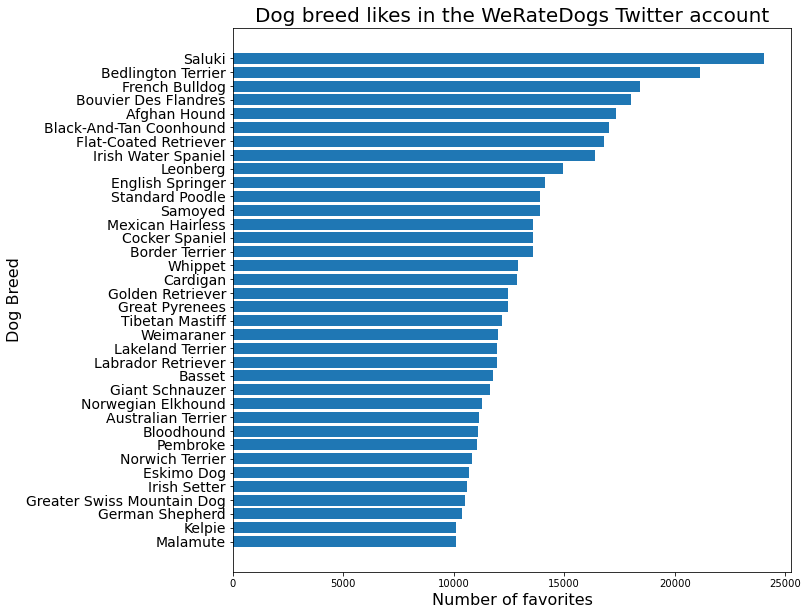

In [102]:
names = df123_10kfav.index
values = df123_10kfav.values

plt.figure(figsize=(10, 10))

plt.barh(names, values)

plt.ylabel('Dog Breed', fontsize=16)
plt.xlabel('Number of favorites', fontsize=16)
plt.title('Dog breed likes in the WeRateDogs Twitter account', fontsize=20)

plt.xticks(fontsize=10)
plt.yticks(fontsize=14)

plt.savefig('dog_likes.png',  bbox_inches='tight')

plt.show()

We have a sample of dog breeds that seem to generate more than 10,000 likes on average., with Saluki and Bedlington Terrier at more than 20,000.

#### 3. What are the most popular names?

In [103]:
df123_clean['name'].value_counts()[df123_clean['name'].value_counts() > 3]

Lucy       10
Cooper     10
Charlie    10
Oliver      9
Tucker      9
Penny       8
Winston     7
Daisy       7
Sadie       7
Toby        6
Lola        6
Koda        6
Jax         6
Bella       5
Oscar       5
Stanley     5
Leo         5
Rusty       5
Bo          5
Scout       4
Bear        4
Maggie      4
Bentley     4
Reggie      4
Chester     4
Oakley      4
Milo        4
Louis       4
Cassie      4
George      4
Finn        4
Scooter     4
Larry       4
Duke        4
Winnie      4
Alfie       4
Gus         4
Dexter      4
Dave        4
Bailey      4
Sophie      4
Brody       4
Jack        4
Name: name, dtype: int64

We see that people on this account tend to give them rather short names, that could also belong to humans.